In [1]:
from vehicle_detection_pipeline import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%load_ext autoreload 
%autoreload 2
%matplotlib inline  

In [2]:
orig_img = mpimg.imread('./test_image.jpg')
shape = orig_img.shape
# load a pe-trained svc model from a serialized (pickle) file
dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
my_svc_model = pickle.load(open('svc_model.pkl','rb'))
my_scaler = pickle.load(open('svc_scaler.pkl','rb'))
# get attributes of our svc object
svc = my_svc_model #dist_pickle["svc"]
X_scaler = my_scaler #dist_pickle["scaler"]
orient = 32 #dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = 32#dist_pickle["hist_bins"]


/home/chuondao/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/chuondao/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator StandardScaler from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
print(cell_per_block, pix_per_cell)

2 8


In [102]:
ystart = orig_img.shape[1]//4
ystop = orig_img.shape[1]
print(ystart,ystop)
scale = 1.5
heat_map = np.zeros((orig_img.shape[0], orig_img.shape[1]))
heat_map, labels = slide_windows_and_update_heat_map(orig_img, ystart,
                                      ystop, scale, svc,
                                      X_scaler, orient,
                                          pix_per_cell,
                                          cell_per_block,
                                          spatial_size, hist_bins,
                                          window_size=64,
                                          cells_per_step=2,
                                          threshold=1,
                                         heat_map=heat_map)

320 1280
hog shape (32, 105, 2, 2, 32)


In [112]:
len(np.where(heat_map == 1)[0])

18432

Box1  ((584, 24), (703, 215))
Box1  ((560, 288), (679, 479))


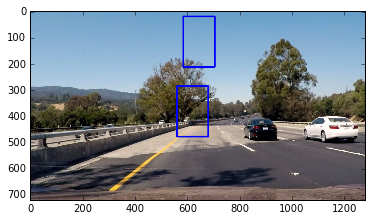

In [104]:
copy_img = np.copy(orig_img)
draw_bounding_boxes_from_labels(copy_img, labels)
plt.imshow(copy_img)

In [110]:
heat_map[479,655]

1.0

In [113]:
heat_map.shape

(720, 1280)